<a href="https://colab.research.google.com/github/EmmanuelFR/Desafio_2_IA-Machine_Learning/blob/main/Desafio_2_IA_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown

In [ ]:
import gdown
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [ ]:
# Link para download do Google Drive usando o ID
url = 'https://drive.google.com/uc?id=1PXow8BLfntTMG1qegOElB2g5kLRkkAkY'
output = 'heart.csv'

# Baixar o arquivo
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1PXow8BLfntTMG1qegOElB2g5kLRkkAkY
To: /content/heart.csv
100%|██████████| 38.1k/38.1k [00:00<00:00, 45.4MB/s]


'heart.csv'

In [ ]:
# Verificar o conteúdo do arquivo baixado
with open(output, 'r') as file:
    content = file.read()
    print(content[:500])  # Exibe os primeiros 500 caracteres

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,1,0,125,212,0,1,168,0,1,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1,1,0,2,1
58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
43,0,0,132,341,1,0,


In [ ]:
# Carregar o dataset
df = pd.read_csv(output)

# Exibir as primeiras linhas do dataset para conferir
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
# Separar as features (X) e o target (y)
X = df.drop('target', axis=1)  # Supondo que 'target' seja a coluna que você deseja prever
y = df['target']

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verificar as formas dos conjuntos
print(f"Formato do conjunto de treino: {X_train.shape}")
print(f"Formato do conjunto de teste: {X_test.shape}")

Formato do conjunto de treino: (820, 13)
Formato do conjunto de teste: (205, 13)


In [ ]:
# Definir o modelo
model = Sequential()

# Adicionar camadas à rede
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu')) # Primeira camada oculta
model.add(Dense(16, activation='relu')) # Segunda camada oculta
model.add(Dense(1, activation='sigmoid'))  # Camada de saída (para classificação binária)

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.002), loss='binary_crossentropy', metrics=['accuracy'])
# learning_rate=0.001

# Definir o callback para Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Treinar o modelo com o callback
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6872 - loss: 0.6227 - val_accuracy: 0.7610 - val_loss: 0.5155
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8297 - loss: 0.4266 - val_accuracy: 0.7805 - val_loss: 0.4547
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8612 - loss: 0.3413 - val_accuracy: 0.8000 - val_loss: 0.4347
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8860 - loss: 0.2912 - val_accuracy: 0.8195 - val_loss: 0.4227
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9057 - loss: 0.2796 - val_accuracy: 0.8293 - val_loss: 0.4050
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9139 - loss: 0.2615 - val_accuracy: 0.8488 - val_loss: 0.3890
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9236 - loss: 0.2605 - val_accuracy: 0.8488 - val_loss: 0.3730
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9277 - loss: 0.2254 - val_accuracy: 0.8488 - 

In [ ]:
# Fazer previsões
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Acurácia no conjunto de teste: 0.9853658536585366


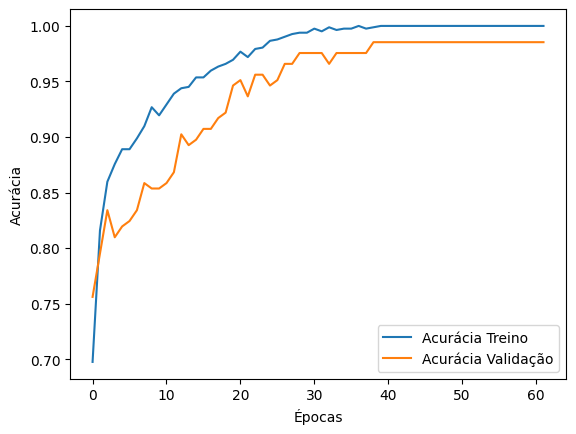

In [ ]:
# Plotar a acurácia do treinamento e validação
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

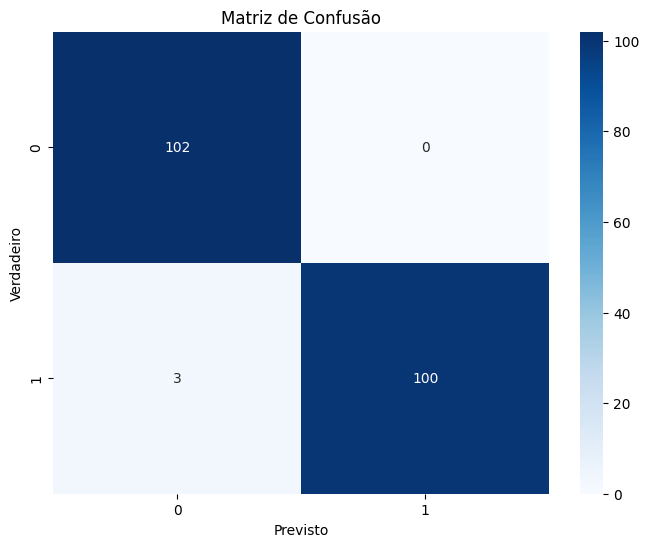

In [ ]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


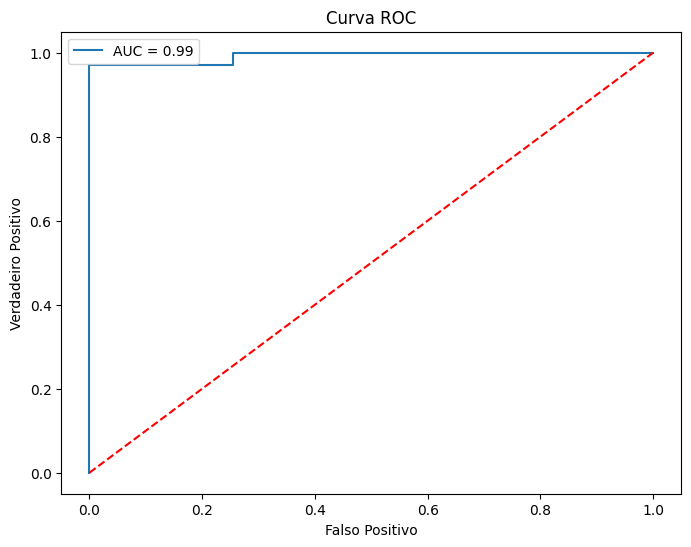

In [ ]:
# Calcular a AUC e os valores da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
auc = roc_auc_score(y_test, model.predict(X_test))

# Plotar a curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [ ]:
# Gerar o relatório de classificação
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
# Calcular o log loss
logloss = log_loss(y_test, model.predict(X_test))
print(f'Log Loss: {logloss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Log Loss: 0.07636368206760598


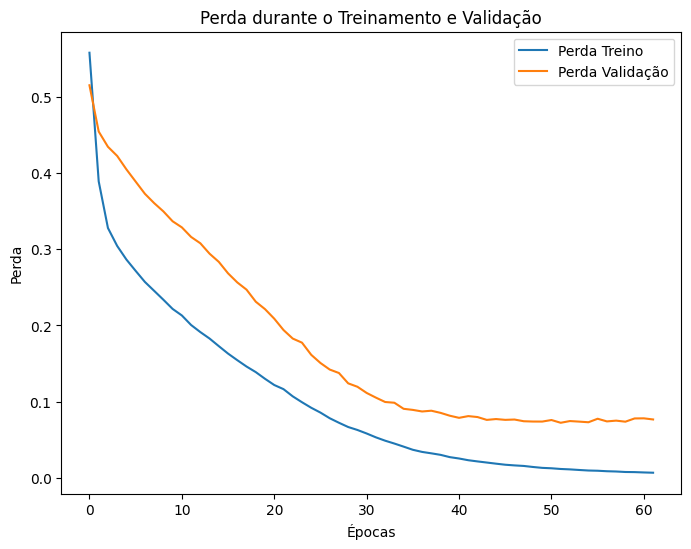

In [ ]:
# Plotar a perda (loss) do treinamento e validação ao longo das épocas
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Perda Treino')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda durante o Treinamento e Validação')
plt.show()